# **TUGAS BESAR VISI KOMPUTER - KLASIFIKASI KEMATANGAN PISANG DENGAN CNN**
M Ivan Irsanto


1301200467


IF4408

# **PART 2 - MENJALANKAN MODEL DAN MELAKUKAN KLASIFIKASI KEMATANGAN PISANG**

# **Importing Libraries**

In [2]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Test set Image Processing**

In [4]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/banana-ripeness/training',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 330 files belonging to 3 classes.


# **Loading Model**

In [6]:
model = tf.keras.models.load_model('/content/trained_model.h5')

# **Visualising and Performing Prediction on Multiple**

<ipython-input-7-c716a9a90608>:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)


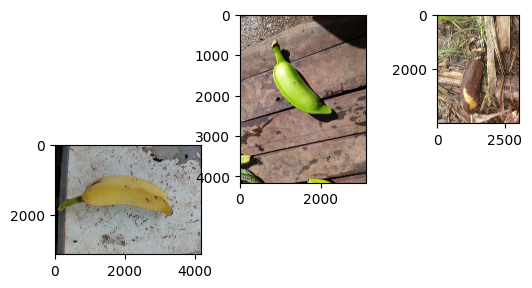

In [7]:
#Test Image Visualization
import cv2
image_path1 = '/content/drive/MyDrive/banana-ripeness/test/banana_ripe/20230204_084840754_jpg.rf.c8ae13c189109ec33af0f25aeb8665a6.jpg'  #ripe
image_path2 = '/content/drive/MyDrive/banana-ripeness/test/banana_raw/20230204_083318940_jpg.rf.296e3bf4166324bd66595030583eed18.jpg'   #raw
image_path3 = '/content/drive/MyDrive/banana-ripeness/test/banana_overripe/20230217_092533_jpg.rf.6bdec515762c8690956344957406c742.jpg' #overripe
# Reading an image in default mode
img1 = cv2.imread(image_path1)
img2 = cv2.imread(image_path2)
img3 = cv2.imread(image_path3)

img1 = cv2.imread(image_path1)
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

img2 = cv2.imread(image_path2)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

img3 = cv2.imread(image_path3)
img3 = cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)
# Displaying the image
plt.title('Test Image')
plt.subplot(1,3,1)
plt.imshow(img1)
plt.subplot(2,3,2)
plt.imshow(img2)
plt.subplot(3,3,3)
plt.imshow(img3)
#plt.xticks([])
#plt.yticks([])
plt.show()

# **Testing Model**

**First Image**

In [9]:
image1 = tf.keras.preprocessing.image.load_img(image_path1,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image1)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions1 = model.predict(input_arr)

1/1 [==============================] - 0s 28ms/step


In [10]:
print(predictions1)

[[1.3607352e-04 1.0725379e-05 9.9985313e-01]]


In [11]:
test_set.class_names

['banana_overripe', 'banana_raw', 'banana_ripe']

In [12]:
result_index1 = np.argmax(predictions1) #Return index of max element
print(result_index1)

2


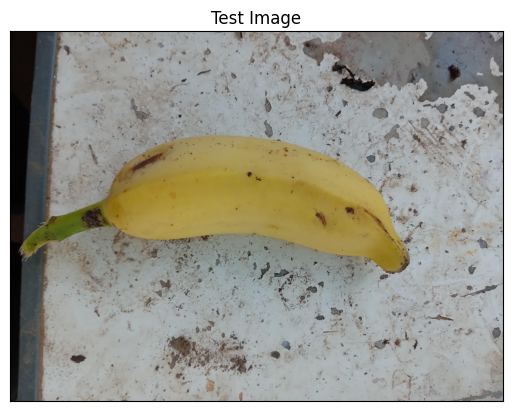

In [13]:
# Displaying the image
plt.imshow(img1)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [14]:
#Image Prediction
print("Banana Type: {}".format(test_set.class_names[result_index1]))

Banana Type: banana_ripe


**Second Image**

In [15]:
image2 = tf.keras.preprocessing.image.load_img(image_path2,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image2)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions2 = model.predict(input_arr)

1/1 [==============================] - 0s 28ms/step


In [16]:
result_index2 = np.argmax(predictions2) #Return index of max element
print(result_index2)

1


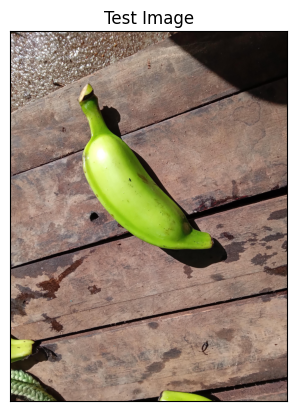

In [17]:
# Displaying the image
plt.imshow(img2)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [18]:
#Image Prediction
print("Banana Type: {}".format(test_set.class_names[result_index2]))

Banana Type: banana_raw


**Third Image**

In [19]:
image3 = tf.keras.preprocessing.image.load_img(image_path3,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image3)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions3 = model.predict(input_arr)

1/1 [==============================] - 0s 28ms/step


In [20]:
result_index3 = np.argmax(predictions3) #Return index of max element
print(result_index3)

0


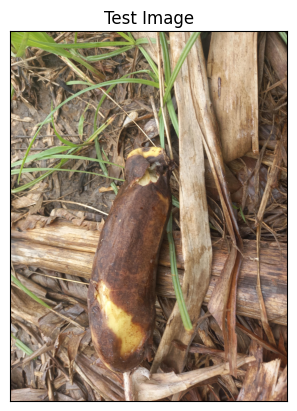

In [21]:
# Displaying the image
plt.imshow(img3)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [22]:
#Image Prediction
print("Banana Type: {}".format(test_set.class_names[result_index3]))

Banana Type: banana_overripe


# **Klasifikasi Validation Sample Kematangan Pisang**

Pada bagian ini, akan dilakukan for loop pada keseluruhan validation sample, setiap image akan diklasifikasi tipe kematangan pisang tersebut.

In [24]:
import os

# Set the path to the directory containing the test images
base_path = '/content/drive/MyDrive/banana-ripeness/validation/'

# Loop through each folder (banana_raw, banana_ripe, banana_overripe)
for folder_name in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder_name)

    # Loop through each image in the folder
    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)

        # Load and preprocess the image
        image = tf.keras.preprocessing.image.load_img(image_path, target_size=(64, 64))
        input_arr = tf.keras.preprocessing.image.img_to_array(image)
        input_arr = np.array([input_arr])  # Convert single image to a batch.

        # Make predictions
        predictions = model.predict(input_arr)
        result_index = np.argmax(predictions)

        # Print the prediction result
        print(f"Image: {image_name}, Banana Type: {test_set.class_names[result_index]}")


1/1 [==============================] - 0s 32ms/step
Image: 20230204_083314019_jpg.rf.6f22efed9c8c1dce4df3c0a177f70459.jpg, Banana Type: banana_raw
1/1 [==============================] - 0s 41ms/step
Image: 20230204_083323351_jpg.rf.e8317482ee82e442cf3efd8941cd8652.jpg, Banana Type: banana_raw
1/1 [==============================] - 0s 52ms/step
Image: 20230204_083318940_jpg.rf.296e3bf4166324bd66595030583eed18.jpg, Banana Type: banana_raw
1/1 [==============================] - 0s 41ms/step
Image: 20230204_084519813_jpg.rf.391fc9ea9001eb60e581adfa5afe855c.jpg, Banana Type: banana_raw
1/1 [==============================] - 0s 46ms/step
Image: 20230204_084534752_jpg.rf.c5879758bcf63f871af6bc06d8d1271c.jpg, Banana Type: banana_raw
1/1 [==============================] - 0s 43ms/step
Image: 20230204_084628_jpg.rf.c34737342ca9b16fce8dd8aac7e103ab.jpg, Banana Type: banana_raw
1/1 [==============================] - 0s 47ms/step
Image: 20230204_084835_jpg.rf.ece8cbb9cbc38c5d6b9287385a2ca327.jpg, B